IBM HACK CHALLENGE 2023

Technology Track: Applied Data Science

Topic Name: Identifying Patterns and Trends in Campus Placement Data Using Machine Learning

Team Member:
Pooja Sharma
Nainisha Sharma
Akash Patil

# **Tables**

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [21]:
df['salary'].fillna(0,inplace = True)
gender_analysis =  df[['gender','status']].groupby(['gender'], as_index = False).count()
gender_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['gender'],as_index = False).count()
gender_analysis['Placed'] = gender_analysis1['status']
gender_analysis['Placed_Percent'] = gender_analysis['Placed']/gender_analysis['status']*100
gender_analysis.rename(columns = {'gender':'Gender' , 'status':'Total_Students'})

gender_analysis2 = df[['gender', 'salary']].groupby(['gender'], as_index=False).mean()
gender_analysis2.rename(columns={'salary': 'Average_Salary'}, inplace=True)

    # Merge the two analyses based on the 'gender' column
result_df = pd.merge(gender_analysis, gender_analysis2, on='gender')
result_df

,gender,status,Placed,Placed_Percent,Average_Salary
0,F,76,48,63.157895,168815.789474
1,M,139,100,71.942446,215043.165468


The gender distinctions in the table above reflect the following points:
1. Males received jobs more frequently than females,
2. And they also made on average more money.

In [22]:
boards_analysis =  df[['ssc_b','status']].groupby(['ssc_b'], as_index = False).count()
boards_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['ssc_b'],as_index = False).count()
boards_analysis['Placed'] = boards_analysis1['status']
boards_analysis['Placed_Percent'] = boards_analysis['Placed']/boards_analysis['status']*100
boards_analysis.rename(columns = {'ssc_b':'SSC_Board' , 'status':'Total_Students'})
boards_analysis

,ssc_b,status,Placed,Placed_Percent
0,Central,116,78,67.241379
1,Others,99,70,70.707071


People who studied from Central SSC board got placed more compared to others.

In [23]:
hscboards_analysis =  df[['hsc_b','status']].groupby(['hsc_b'], as_index = False).count()
hscboards_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['hsc_b'],as_index = False).count()
hscboards_analysis['Placed'] = hscboards_analysis1['status']
hscboards_analysis['Placed_Percent'] = hscboards_analysis['Placed']/hscboards_analysis['status']*100
hscboards_analysis.rename(columns = {'hsc_b':'HSC_Board' , 'status':'Total_Students'})

,HSC_Board,Total_Students,Placed,Placed_Percent
0,Central,84,57,67.857143
1,Others,131,91,69.465649


People who studied from Central HSC board got placed less compared to others.

In [24]:
hscsubject_analysis =  df[['hsc_s','status']].groupby(['hsc_s'], as_index = False).count()
hscsubject_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['hsc_s'],as_index = False).count()
hscsubject_analysis['Placed'] = hscsubject_analysis1['status']
hscsubject_analysis['Placed_Percent'] = hscsubject_analysis['Placed']/hscsubject_analysis['status']*100
hscsubject_analysis.rename(columns = {'hsc_s':'HSC_subject' , 'status':'Total_Students'})

,HSC_subject,Total_Students,Placed,Placed_Percent
0,Arts,11,6,54.545455
1,Commerce,113,79,69.911504
2,Science,91,63,69.230769


People with Commerce and Science got placed more compared to Arts.

In [25]:
specialisation_analysis =  df[['specialisation','status']].groupby(['specialisation'], as_index = False).count()
specialisation_analysis1 = df.loc[df['status'] == 'Placed'].groupby(['specialisation'],as_index = False).count()
specialisation_analysis['Placed'] = specialisation_analysis1['status']
specialisation_analysis['Placed_Percent'] = specialisation_analysis['Placed']/specialisation_analysis['status']*100
specialisation_analysis.rename(columns = {'specialisation':'MBA_specialisation' , 'status':'Total_Students'})

,MBA_specialisation,Total_Students,Placed,Placed_Percent
0,Mkt&Fin,120,95,79.166667
1,Mkt&HR,95,53,55.789474


People who have experience in marketing and finance got placed more compared to people who have experience in marketing and HR.

## **Graph**

<ipython-input-26-165d7a7bc533>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_male['salary'].loc[df['salary']!=0] , ax = ax[0])
<ipython-input-26-165d7a7bc533>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_female['salary'].loc[df['salary']!=0] , ax = ax[1])


Text(0.5, 1.0, 'Female')

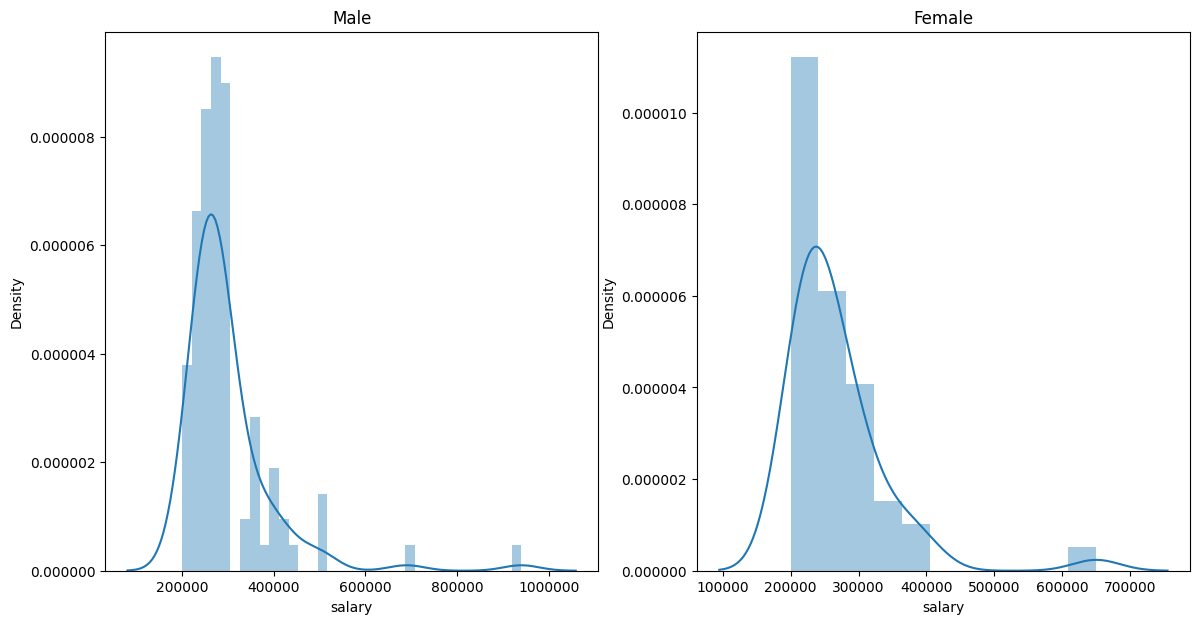

In [26]:
fig, ax =plt.subplots(1,2 , figsize = (14,7))
df_male = df.loc[df['gender'] == 'M']
df_female = df.loc[df['gender'] == 'F']
sns.distplot(df_male['salary'].loc[df['salary']!=0] , ax = ax[0])
sns.distplot(df_female['salary'].loc[df['salary']!=0] , ax = ax[1])
ax[0].ticklabel_format(style = 'plain')
ax[1].ticklabel_format(style = 'plain')
ax[0].set_title("Male")
ax[1].set_title("Female")

<Axes: xlabel='workex', ylabel='count'>

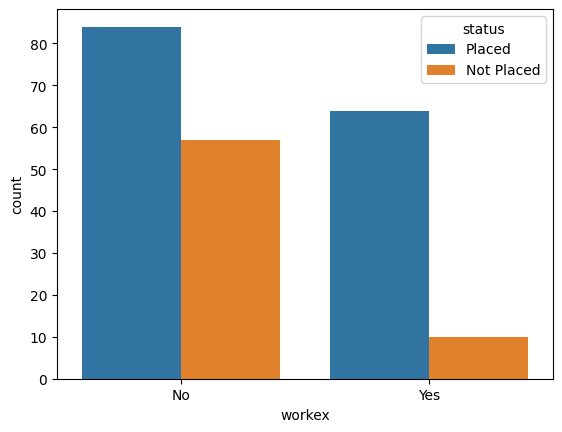

In [27]:
sns.countplot(x = 'workex' , data =df , hue = 'status')

People who have experience have more chances to get placed than people with no experience.

<Axes: xlabel='degree_t', ylabel='count'>

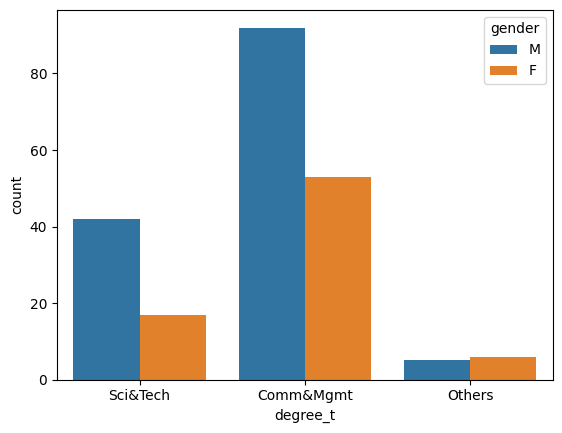

In [28]:
sns.countplot(x = 'degree_t' , data =df , hue = 'gender')

<Axes: xlabel='specialisation', ylabel='salary'>

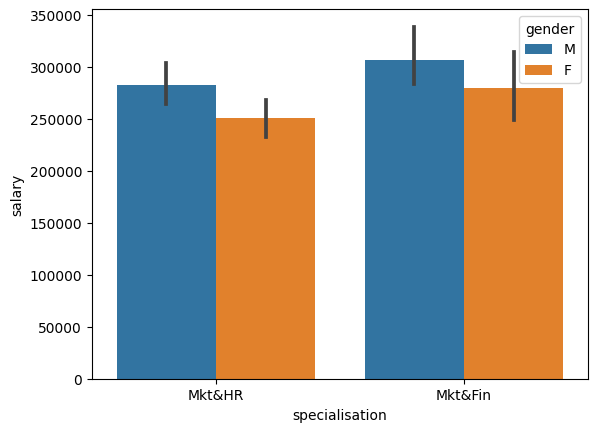

In [29]:
sns.barplot(x = 'specialisation' , y = 'salary' , data =df.loc[df['status']== 'Placed'] , hue = 'gender')

## **Career Prediction**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [31]:
df = pd.read_csv('student_data.csv')
df.head()

,Branch,CGPA,Backlogs,Interest,Profession
0,Information Technology,6.872701,7,Web Development,Web Developer
1,Information Technology,9.753572,1,Network Engineering,Network Engineer
2,Electrical Engineering,8.659970,4,AIML,AI Engineer
3,Civil Engineering,7.993292,4,AIML,AI Engineer
4,Information Technology,5.780093,5,Web Development,Web Developer


In [32]:
X = df[['Branch', 'CGPA', 'Backlogs', 'Interest']]
y = df['Profession']

In [33]:
label_encoders = {}
for col in ['Branch', 'Interest']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

<ipython-input-33-102169b65437>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-33-102169b65437>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.tree import DecisionTreeClassifier
# Create and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
input_features = ['Computer Science', 8.5, 2, 'AIML']
encoded_input = [label_encoders[col].transform([input_features[i]])[0] if col in label_encoders else input_features[i] for i, col in enumerate(X.columns)]
predicted_profession = model.predict([encoded_input])[0]
print(f"Predicted Profession: {predicted_profession}")

Predicted Profession: AI Engineer


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [37]:
input_features = ['Information Technology', 8.5, 2, 'Web Development']
encoded_input = [label_encoders[col].transform([input_features[i]])[0] if col in label_encoders else input_features[i] for i, col in enumerate(X.columns)]
predicted_profession = model.predict([encoded_input])[0]
print(f"Predicted Profession: {predicted_profession}")

Predicted Profession: Web Developer


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
